1. Library Imports


In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from sklearn.tree import DecisionTreeRegressor, plot_tree
print("libraries installed succeffuly")

libraries installed succeffuly


2. Data Loading



In [ ]:
data = pd.read_csv("/content/enhanced_sales_data.csv")


3. Basic Data Exploration


In [ ]:
# Displaying the first few rows of the dataframe to check the data's structure and first entries
data.head()

,Transaction ID,Customer ID,Product ID,Quantity,Price per Unit,Age,Gender,Location,Income Group,Product Name,...,Age Group,Season,Is Holiday,Customer Segment,Product Return Rate,Location_Chicago,Location_Houston,Location_Los Angeles,Location_New York,Total Sales
0,1597,1270,46,1,662.76,55.0,0,2,1,6,...,0,0,False,Premium,0.02,0,0,1,0,662.76
1,863,72,50,3,210.84,NaN,2,4,3,4,...,1,0,False,New,0.02,0,0,0,0,632.52
2,535,190,26,2,756.48,35.0,1,2,0,3,...,0,3,True,Regular,0.02,0,0,1,0,1512.96
3,1646,480,5,2,759.62,65.0,0,1,0,6,...,1,3,False,Regular,0.02,0,1,0,0,1519.24
4,1424,440,42,2,708.30,NaN,2,2,0,4,...,1,1,False,Regular,0.05,0,0,1,0,NaN


In [ ]:
print(data.shape)


(1944, 24)


In [ ]:
describe = data.describe().T
describe.style.background_gradient(cmap="Purples")


,count,mean,std,min,25%,50%,75%,max
Transaction ID,1944.000000,972.500000,561.328781,1.000000,486.750000,972.500000,1458.250000,1944.000000
Customer ID,1944.000000,529.630658,489.263823,1.000000,86.000000,340.500000,936.250000,1544.000000
Product ID,1944.000000,25.304527,14.331954,1.000000,13.000000,25.000000,37.000000,50.000000
Quantity,1944.000000,2.447531,1.103648,1.000000,1.000000,2.000000,3.000000,4.000000
Price per Unit,1944.000000,509.472294,281.480155,10.620000,271.580000,520.930000,748.197500,999.850000
Age,1609.000000,43.221255,15.010843,18.000000,31.000000,42.000000,57.000000,69.000000
Gender,1944.000000,0.738683,0.733456,0.000000,0.000000,1.000000,1.000000,2.000000
Location,1944.000000,1.801955,1.306532,0.000000,1.000000,2.000000,3.000000,4.000000
Income Group,1944.000000,1.264918,0.995245,0.000000,0.000000,1.000000,2.000000,3.000000
Product Name,1944.000000,5.009259,1.987329,0.000000,3.000000,6.000000,6.000000,9.000000


End of Task 1

Task 2




1. Missing Values Analysis


In [ ]:
# Printing the total number of missing values per column and applying a color gradient for visualization

print("Total Missing Values Numbers of columns;")
isnull = pd.DataFrame(data.isnull().sum())
isnull.style.background_gradient(cmap="ocean")

Total Missing Values Numbers of columns;


,0
Transaction ID,0
Customer ID,0
Product ID,0
Quantity,0
Price per Unit,0
Age,335
Gender,0
Location,0
Income Group,0
Product Name,0


2. Imputation of Missing Values


In [ ]:
# Create a new DataFrame 'df1' by copying 'data'
df1 = data.copy()

# Use inplace=True to fill missing 'Age' values with the median
df1['Age'].fillna(df1['Age'].median(), inplace=True)

# Use inplace=True to fill missing 'Total Sales' values with the mean
df1['Total Sales'].fillna(df1['Total Sales'].mean(), inplace=True)

In [ ]:
# Printing the total number of missing values per column and applying a color gradient for visualization

print("Total Missing Values Numbers of columns;")
isnull = pd.DataFrame(df1.isnull().sum())
isnull.style.background_gradient(cmap="ocean")

Total Missing Values Numbers of columns;


,0
Transaction ID,0
Customer ID,0
Product ID,0
Quantity,0
Price per Unit,0
Age,0
Gender,0
Location,0
Income Group,0
Product Name,0


3. Outlier Detection and Removal


In [ ]:
def detect_outliers(column):
    # Calculate the first quartile (Q1) for the given column
    Q1 = data[column].quantile(0.25)

    # Calculate the third quartile (Q3) for the given column
    Q3 = data[column].quantile(0.75)

    # Compute the Interquartile Range (IQR) as the difference between Q3 and Q1
    IQR = Q3 - Q1

    # Determine the lower bound for what's considered an outlier
    lower_bound = Q1 - 1.5 * IQR

    # Determine the upper bound for what's considered an outlier
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers as those values in the column that fall below the lower bound
    # or above the upper bound, and select the data from the column
    outliers = df1[(data[column] < lower_bound) | (data[column] > upper_bound)][column]

    # Return the outliers
    return outliers


In [ ]:
# Detect outliers in the 'Total Sales' column.
outliers_total_sales = detect_outliers('Total Sales')

# Create a cleaned data frame by filtering out the outliers from 'Total Sales'.
# This is achieved by keeping only the rows where 'Total Sales' are within an acceptable range,
# which is defined as not being more than 1.5 times the IQR below the first quartile or above the third quartile.
df1_cleaned = df1[(df1['Total Sales'] >= df1['Total Sales'].quantile(0.25) - 1.5 * (df1['Total Sales'].quantile(0.75) - df1['Total Sales'].quantile(0.25))) &
                    (df1['Total Sales'] <= df1['Total Sales'].quantile(0.75) + 1.5 * (df1['Total Sales'].quantile(0.75) - df1['Total Sales'].quantile(0.25)))]


4. Outlier Detection and Removal


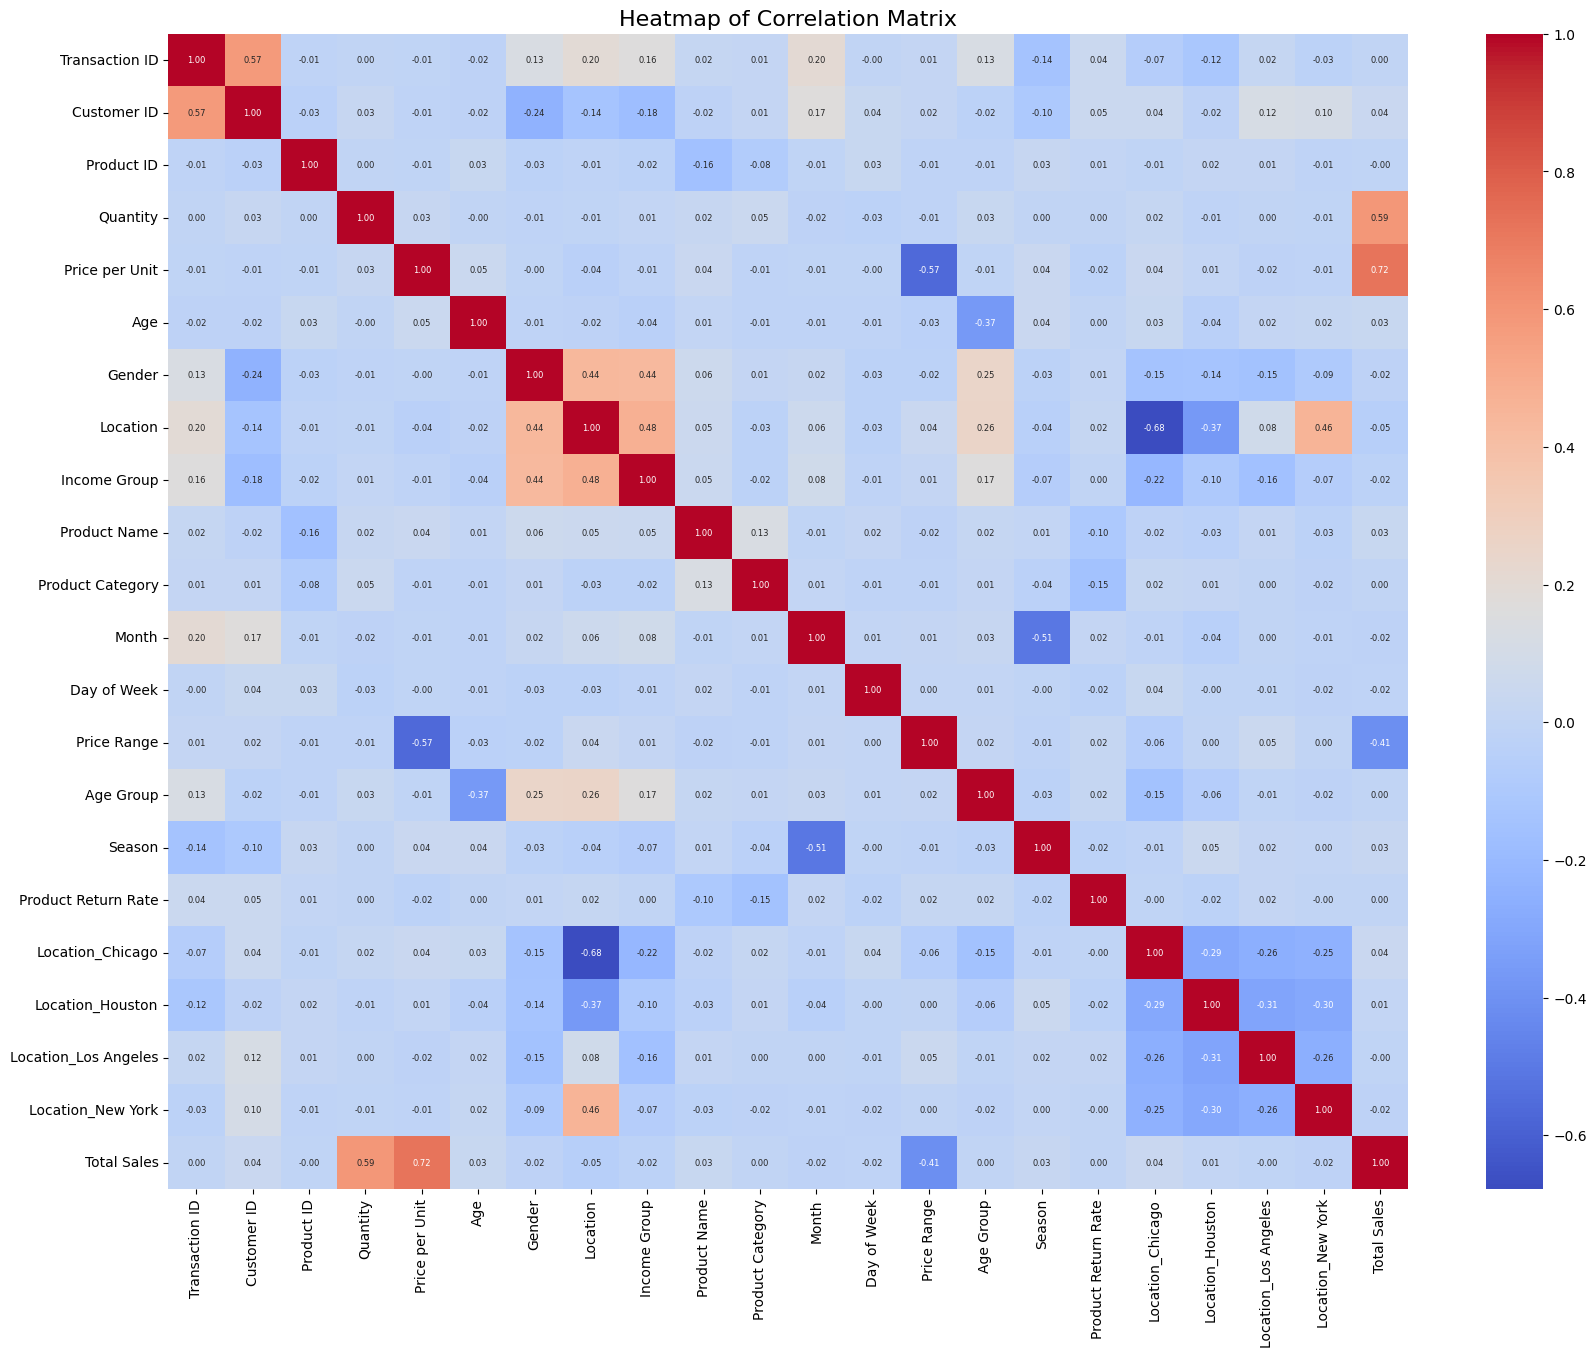

In [ ]:
#Correlation Analysis
numeric_data = df1.select_dtypes(include=[np.number])

# Calculate the correlation matrix on the numeric columns
correlation_matrix = numeric_data.corr()

# Plot the heatmap
plt.figure(figsize=(20, 15))  # Increase figure size
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", annot_kws={"size": 6}, cmap='coolwarm')  # Adjust annot_kws for larger text
plt.title('Heatmap of Correlation Matrix', fontsize=16)  # Increase title font size
plt.xticks(fontsize=10)  # Increase x-axis font size
plt.yticks(fontsize=10)  # Increase y-axis font size
plt.show()

5. Visualizations


In [ ]:
fig = px.histogram(df1, x='Total Sales', title='Distribution of Total Sales',
                   marginal='box', # adds a boxplot on the side for additional distribution insight
                   color_discrete_sequence=['indianred']) # color of the histogram bars
fig.update_layout(xaxis_title='Total Sales', yaxis_title='Count')
fig.show()


scatterPlot

In [ ]:

# Create the count plot
fig = px.histogram(df1, x='Quantity', y='Total Sales', title='Total Sales vs Quantity',
                 color='Product Category', nbins=10)

# Update the layout
fig.update_layout(xaxis_title='Quantity', yaxis_title='Total Sales')

# Show the plot
fig.show()

In [ ]:


fig = px.scatter(df1, x='Price per Unit', y='Total Sales', title='Total Sales vs Price per Unit by Product Category',
                 color='Product Category', hover_data=['Quantity', 'Customer Segment'])
fig.update_layout(xaxis_title='Price per Unit', yaxis_title='Total Sales')
fig.show()


In [ ]:
# Plotly Histogram of 'Total Sales'
fig_total_sales = px.histogram(data, x='Total Sales', title='Histogram of Total Sales vs Customer Segment ',
                               color='Customer Segment', marginal='box',
                               labels={'Total Sales': 'Total Sales'},
                               template='plotly_white')
fig_total_sales.show()


In [ ]:
# Plotting histogram for the "Age" column with KDE
fig_age = px.histogram(df1, x='Age', marginal='violin', title='Age Distribution with KDE',
                       labels={'Age': 'Age'}, template='plotly_white', nbins=30)
fig_age.show()


End Task 2

Task 3

In [ ]:
# Prepare the data
X = df1[['Quantity', 'Price per Unit']]  # Predictor variables
y = df1['Total Sales']  # Target variable


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Initialize the model
model = LinearRegression()

In [ ]:
# Fit the model to the training data
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Predict on the testing set
y_pred = model.predict(X_test)

In [ ]:
# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

In [ ]:
print(f"RMSE: {rmse}")

RMSE: 349.05625849515025


In [ ]:
print(f"R^2: {r2}")

R^2: 0.8606892205726198


In [ ]:
test_data = X_test.copy()
test_data['Total Sales'] = y_test
test_data['Predicted Sales'] = y_pred

# Scatter plot for actual values
fig = px.scatter(test_data, x='Quantity', y='Total Sales', title='Actual vs. Predicted Total Sales by Quantity')

# Simulate regression line for 'Quantity'
# We generate a range of 'Quantity' values for the line
quantity_range = np.linspace(test_data['Quantity'].min(), test_data['Quantity'].max(), 100)
# Predict 'Total Sales' using the model, holding 'Price per Unit' at its mean value
predicted_sales_from_quantity = model.predict(np.column_stack((quantity_range, np.full(quantity_range.shape, test_data['Price per Unit'].mean()))))

# Add the regression line to the plot
fig.add_scatter(x=quantity_range, y=predicted_sales_from_quantity, mode='lines', name='Regression Line', showlegend=True)

# Show the plot
fig.show()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



In [ ]:
import plotly.graph_objects as go


# Creating a grid of 'Quantity' and 'Price per Unit' values
quantity_range = np.linspace(X_test['Quantity'].min(), X_test['Quantity'].max(), 20)
price_range = np.linspace(X_test['Price per Unit'].min(), X_test['Price per Unit'].max(), 20)
quantity_grid, price_grid = np.meshgrid(quantity_range, price_range)

# Predicting 'Total Sales' for each combination of 'Quantity' and 'Price per Unit' in the grid
predictions_grid = model.predict(np.column_stack((quantity_grid.flatten(), price_grid.flatten())))

# Reshaping the predictions to match the grid shape
predictions_grid = predictions_grid.reshape(quantity_grid.shape)

# Plotting
fig = go.Figure()

# Adding the actual data points as scatter plot
fig.add_trace(go.Scatter3d(x=X_test['Quantity'], y=X_test['Price per Unit'], z=y_test,
                           mode='markers', name='Actual Sales',
                           marker=dict(size=5, color='blue', opacity=0.8)))

# Adding the regression plane
fig.add_trace(go.Surface(x=quantity_range, y=price_range, z=predictions_grid, name='Regression Plane', opacity=0.5))

# Setting titles and labels
fig.update_layout(title='3D Visualization of Total Sales with Regression Plane',
                  scene=dict(
                      xaxis_title='Quantity',
                      yaxis_title='Price per Unit',
                      zaxis_title='Total Sales'
                  ),
                  autosize=False,
                  width=800,
                  height=600,
                  margin=dict(l=65, r=50, b=65, t=90))

fig.show()


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



In [ ]:
print(f"RMSE: {rmse}")

RMSE: 349.05625849515025


In [ ]:
print(f"R^2: {r2}")

R^2: 0.8606892205726198


In [ ]:

# Import necessary libraries
from sklearn.ensemble import RandomForestRegressor

# Initialize the Random Forest Regressor model
model2 = RandomForestRegressor()

# Fit the model to the training data
model2.fit(X_train, y_train)

# Predict on the testing set
y_pred2 = model2.predict(X_test)

# Evaluate the model
rmse2 = np.sqrt(mean_squared_error(y_test, y_pred2))
r2_2 = r2_score(y_test, y_pred2)

# Print the results
print(f"Random Forest Regressor Model:")
print(f"RMSE: {rmse2}")
print(f"R^2: {r2_2}")

# Compare the performance of the two models
if rmse2 < rmse:
  print("Random Forest Regressor model performs better.")
else:
  print("Linear Regression model performs better.")


Random Forest Regressor Model:
RMSE: 210.63649101908825
R^2: 0.9492704410886835
Random Forest Regressor model performs better.


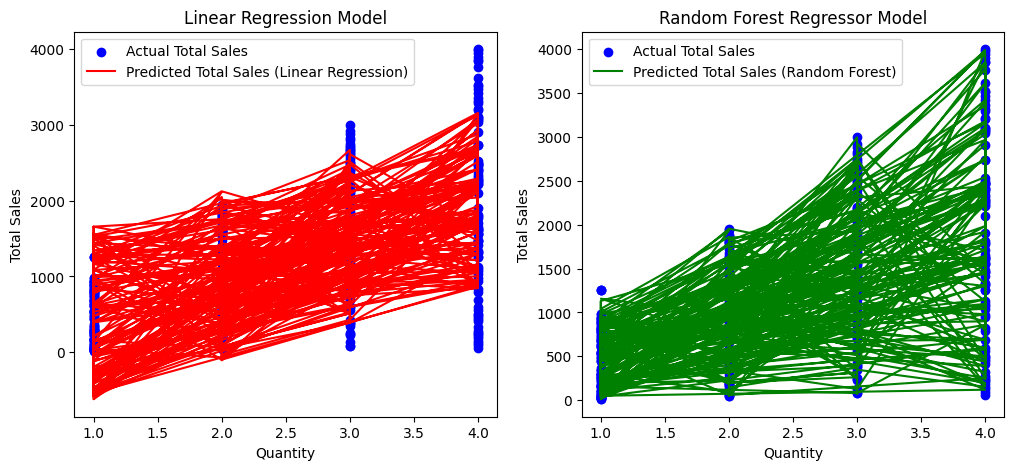

In [ ]:

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Plot the scatter plot on the first subplot
ax1.scatter(X_test['Quantity'], y_test, color='blue', label='Actual Total Sales')
ax1.plot(X_test['Quantity'], y_pred, color='red', label='Predicted Total Sales (Linear Regression)')
ax1.set_xlabel('Quantity')
ax1.set_ylabel('Total Sales')
ax1.set_title('Linear Regression Model')
ax1.legend()

# Plot the scatter plot on the second subplot
ax2.scatter(X_test['Quantity'], y_test, color='blue', label='Actual Total Sales')
ax2.plot(X_test['Quantity'], y_pred2, color='green', label='Predicted Total Sales (Random Forest)')
ax2.set_xlabel('Quantity')
ax2.set_ylabel('Total Sales')
ax2.set_title('Random Forest Regressor Model')
ax2.legend()

# Show the plot
plt.show()


In [ ]:

# Import necessary libraries
import plotly.express as px

# Prepare the data
X = df1[['Quantity', 'Price per Unit']]  # Predictor variables
y = df1['Total Sales']  # Target variable

# Create a 3D scatter plot
fig = px.scatter_3d(df1, x='Quantity', y='Price per Unit', z='Total Sales',
                     color='Product Category')

# Show the plot
fig.show()


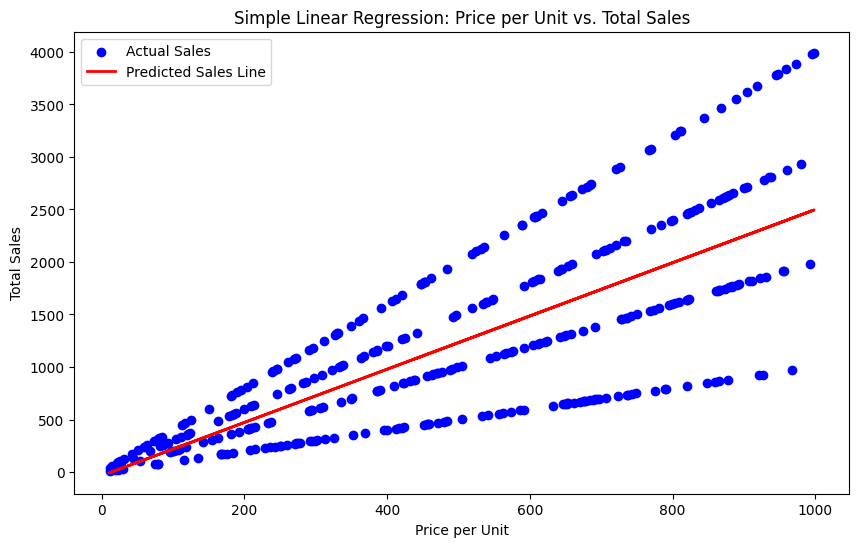

Mean Squared Error: 349415.4536238143
Coefficient for Price per Unit: 2.5354885384416685
Intercept: -35.223782686738105
Random Forest Regressor Model:
RMSE: 210.63649101908825
R^2: 0.9492704410886835


In [ ]:
# Handle missing values in the 'Total Sales' and 'Price per Unit'
data.dropna(subset=['Total Sales', 'Price per Unit'], inplace=True)

# Selecting features and target for the regression
X = data[['Price per Unit']]  # Independent variable: Price per Unit
y = data['Total Sales']       # Dependent variable: Total Sales

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating and training the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predicting on the test set
y_pred = model.predict(X_test)

# Calculating the mean squared error
mse = mean_squared_error(y_test, y_pred)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual Sales')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted Sales Line')
plt.title('Simple Linear Regression: Price per Unit vs. Total Sales')
plt.xlabel('Price per Unit')
plt.ylabel('Total Sales')
plt.legend()
plt.show()

# Printing the results
print("Mean Squared Error:", mse)
print("Coefficient for Price per Unit:", model.coef_[0])
print("Intercept:", model.intercept_)
# Print the results
print(f"Random Forest Regressor Model:")
print(f"RMSE: {rmse2}")
print(f"R^2: {r2_2}")


<ipython-input-51-769bd3bc24e6>:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



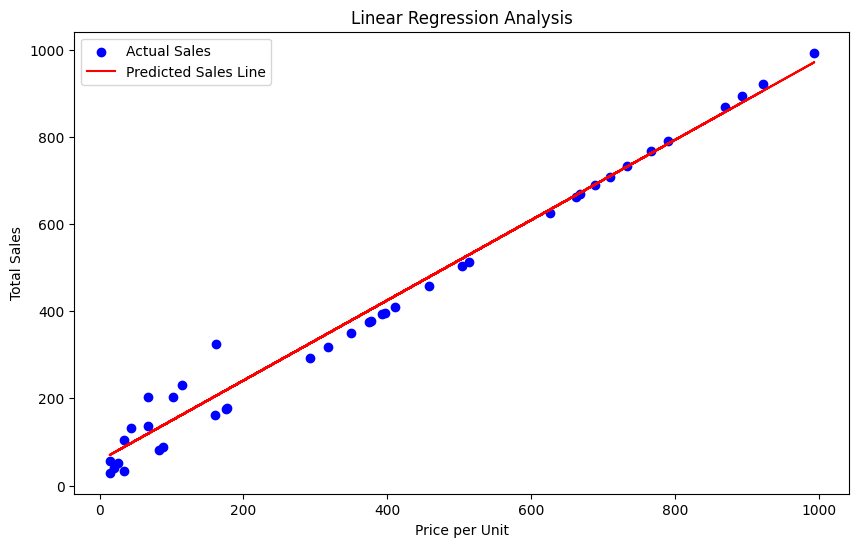

R2: 0.9826464598488354
RMSE: 37.48467823724472


In [ ]:
# Assuming 'data' is pre-loaded and contains the required columns

# Filter data to focus on a specific customer segment, e.g., 'Premium'
premium_data = data[data['Customer Segment'] == 'Premium']

# Calculate an indicator of correlation (simple proxy in this case)
premium_data['correlation_indicator'] = abs(premium_data['Price per Unit'] - premium_data['Total Sales'])

# Sort data by this correlation indicator to get the most relevant samples
sorted_data = premium_data.sort_values(by='correlation_indicator', ascending=True)

# Select the top 200 records for a more focused analysis
selected_sample = sorted_data.head(200)

# Prepare the data for the regression model
X = selected_sample[['Price per Unit']].values
y = selected_sample['Total Sales'].values

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions using the model
y_pred = model.predict(X_test)

# Calculate R2 and RMSE
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Plotting the results
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual Sales')
plt.plot(X_test, y_pred, color='red', label='Predicted Sales Line')
plt.title('Linear Regression Analysis')
plt.xlabel('Price per Unit')
plt.ylabel('Total Sales')
plt.legend()
plt.show()

# Output the R2 and RMSE
print(f"R2: {r2}")
print(f"RMSE: {rmse}")


End Task 3

Task 4

Accuracy: 0.4190231362467866


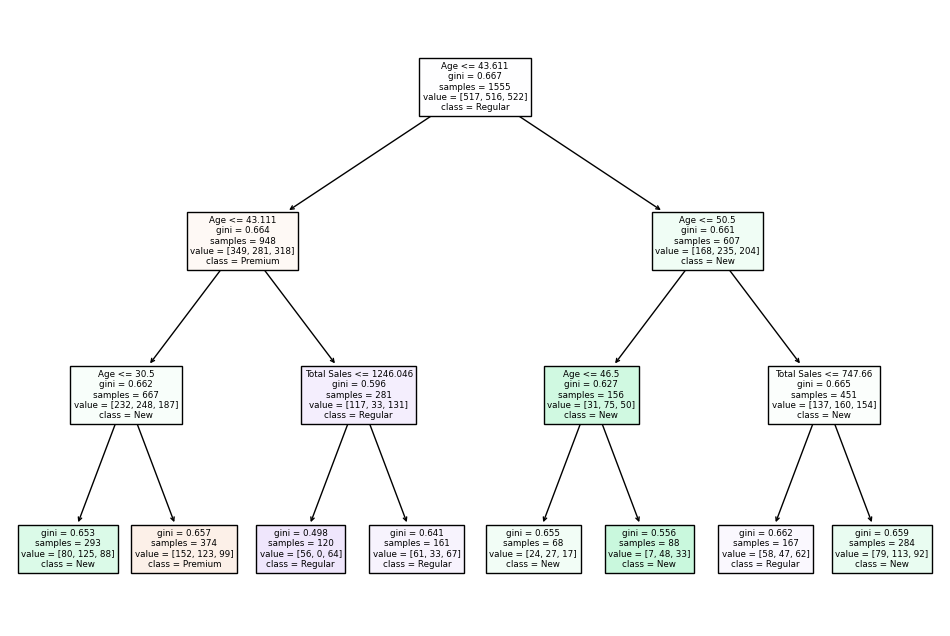

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import tree
import matplotlib.pyplot as plt

# Load the data from the CSV file
data = pd.read_csv("enhanced_sales_data.csv")

# Select the relevant features and the target variable
features = data[['Product Return Rate', 'Total Sales', 'Age']]
target = data['Customer Segment']

# Replace missing values with the mean of the respective column
features = features.fillna(features.mean())

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Create a decision tree classifier with Gini impurity and a maximum depth of 3
clf = DecisionTreeClassifier(criterion='gini', max_depth=3)

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Make predictions on the testing data
predictions = clf.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

# Visualize the decision tree
plt.figure(figsize=(12, 8))
tree.plot_tree(clf, feature_names=features.columns, class_names=target.unique(), filled=True)
plt.show()

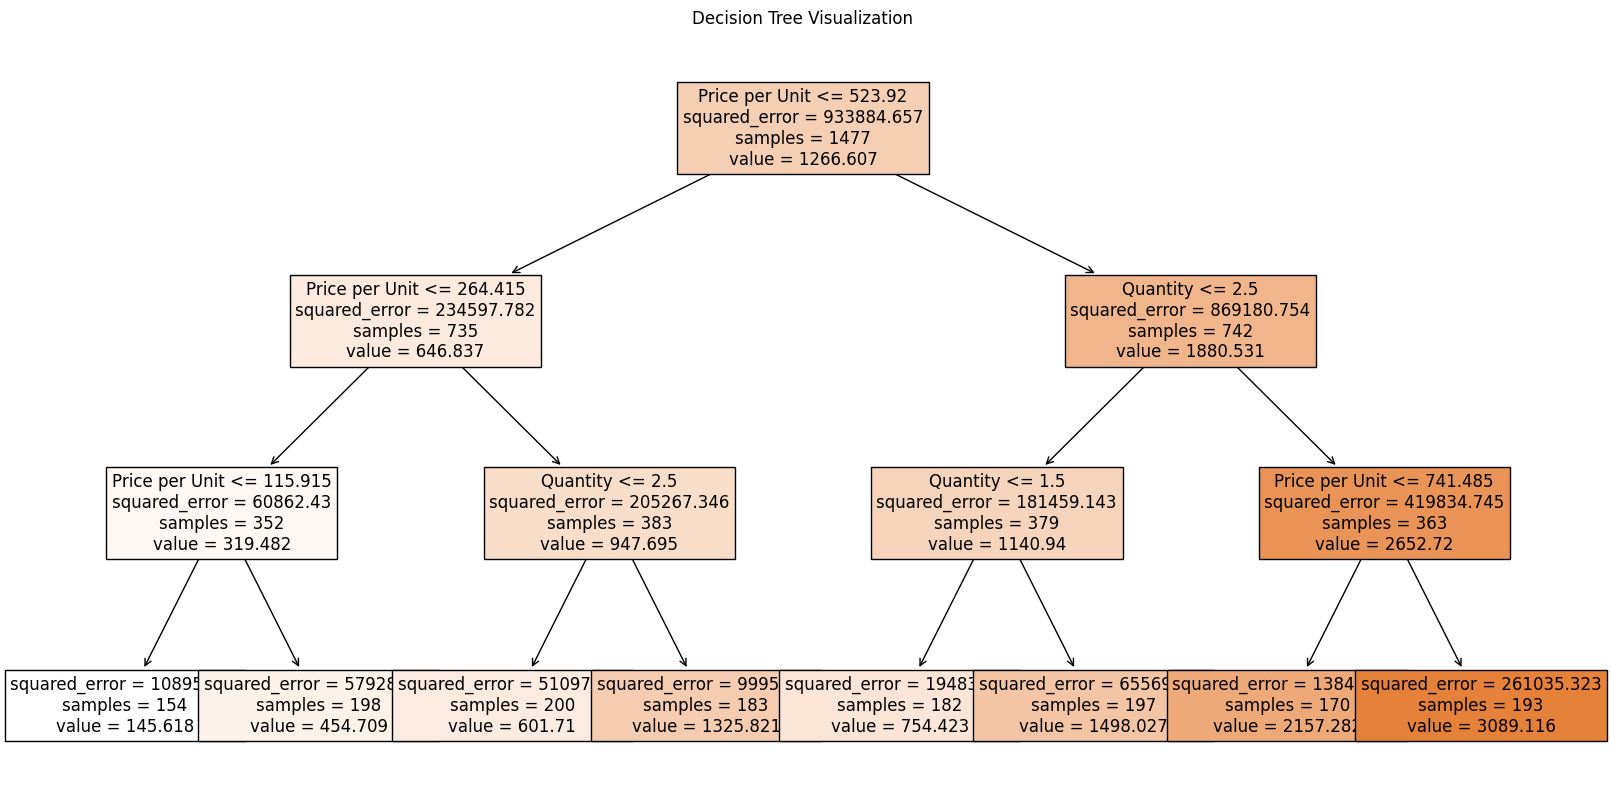

In [ ]:
# Handle missing values in the 'Total Sales', 'Quantity', and 'Price per Unit'
data.dropna(subset=['Total Sales', 'Quantity', 'Price per Unit'], inplace=True)

# Selecting features and target for the regression
X = data[['Quantity', 'Price per Unit']]  # Independent variables
y = data['Total Sales']                   # Dependent variable: Total Sales

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating and training the decision tree model
dtree = DecisionTreeRegressor(max_depth=3)  # Limit depth to keep the tree small
dtree.fit(X_train, y_train)

# Plotting the decision tree
plt.figure(figsize=(20,10))
plot_tree(dtree, filled=True, feature_names=X.columns, fontsize=12)
plt.title('Decision Tree Visualization')
plt.show()



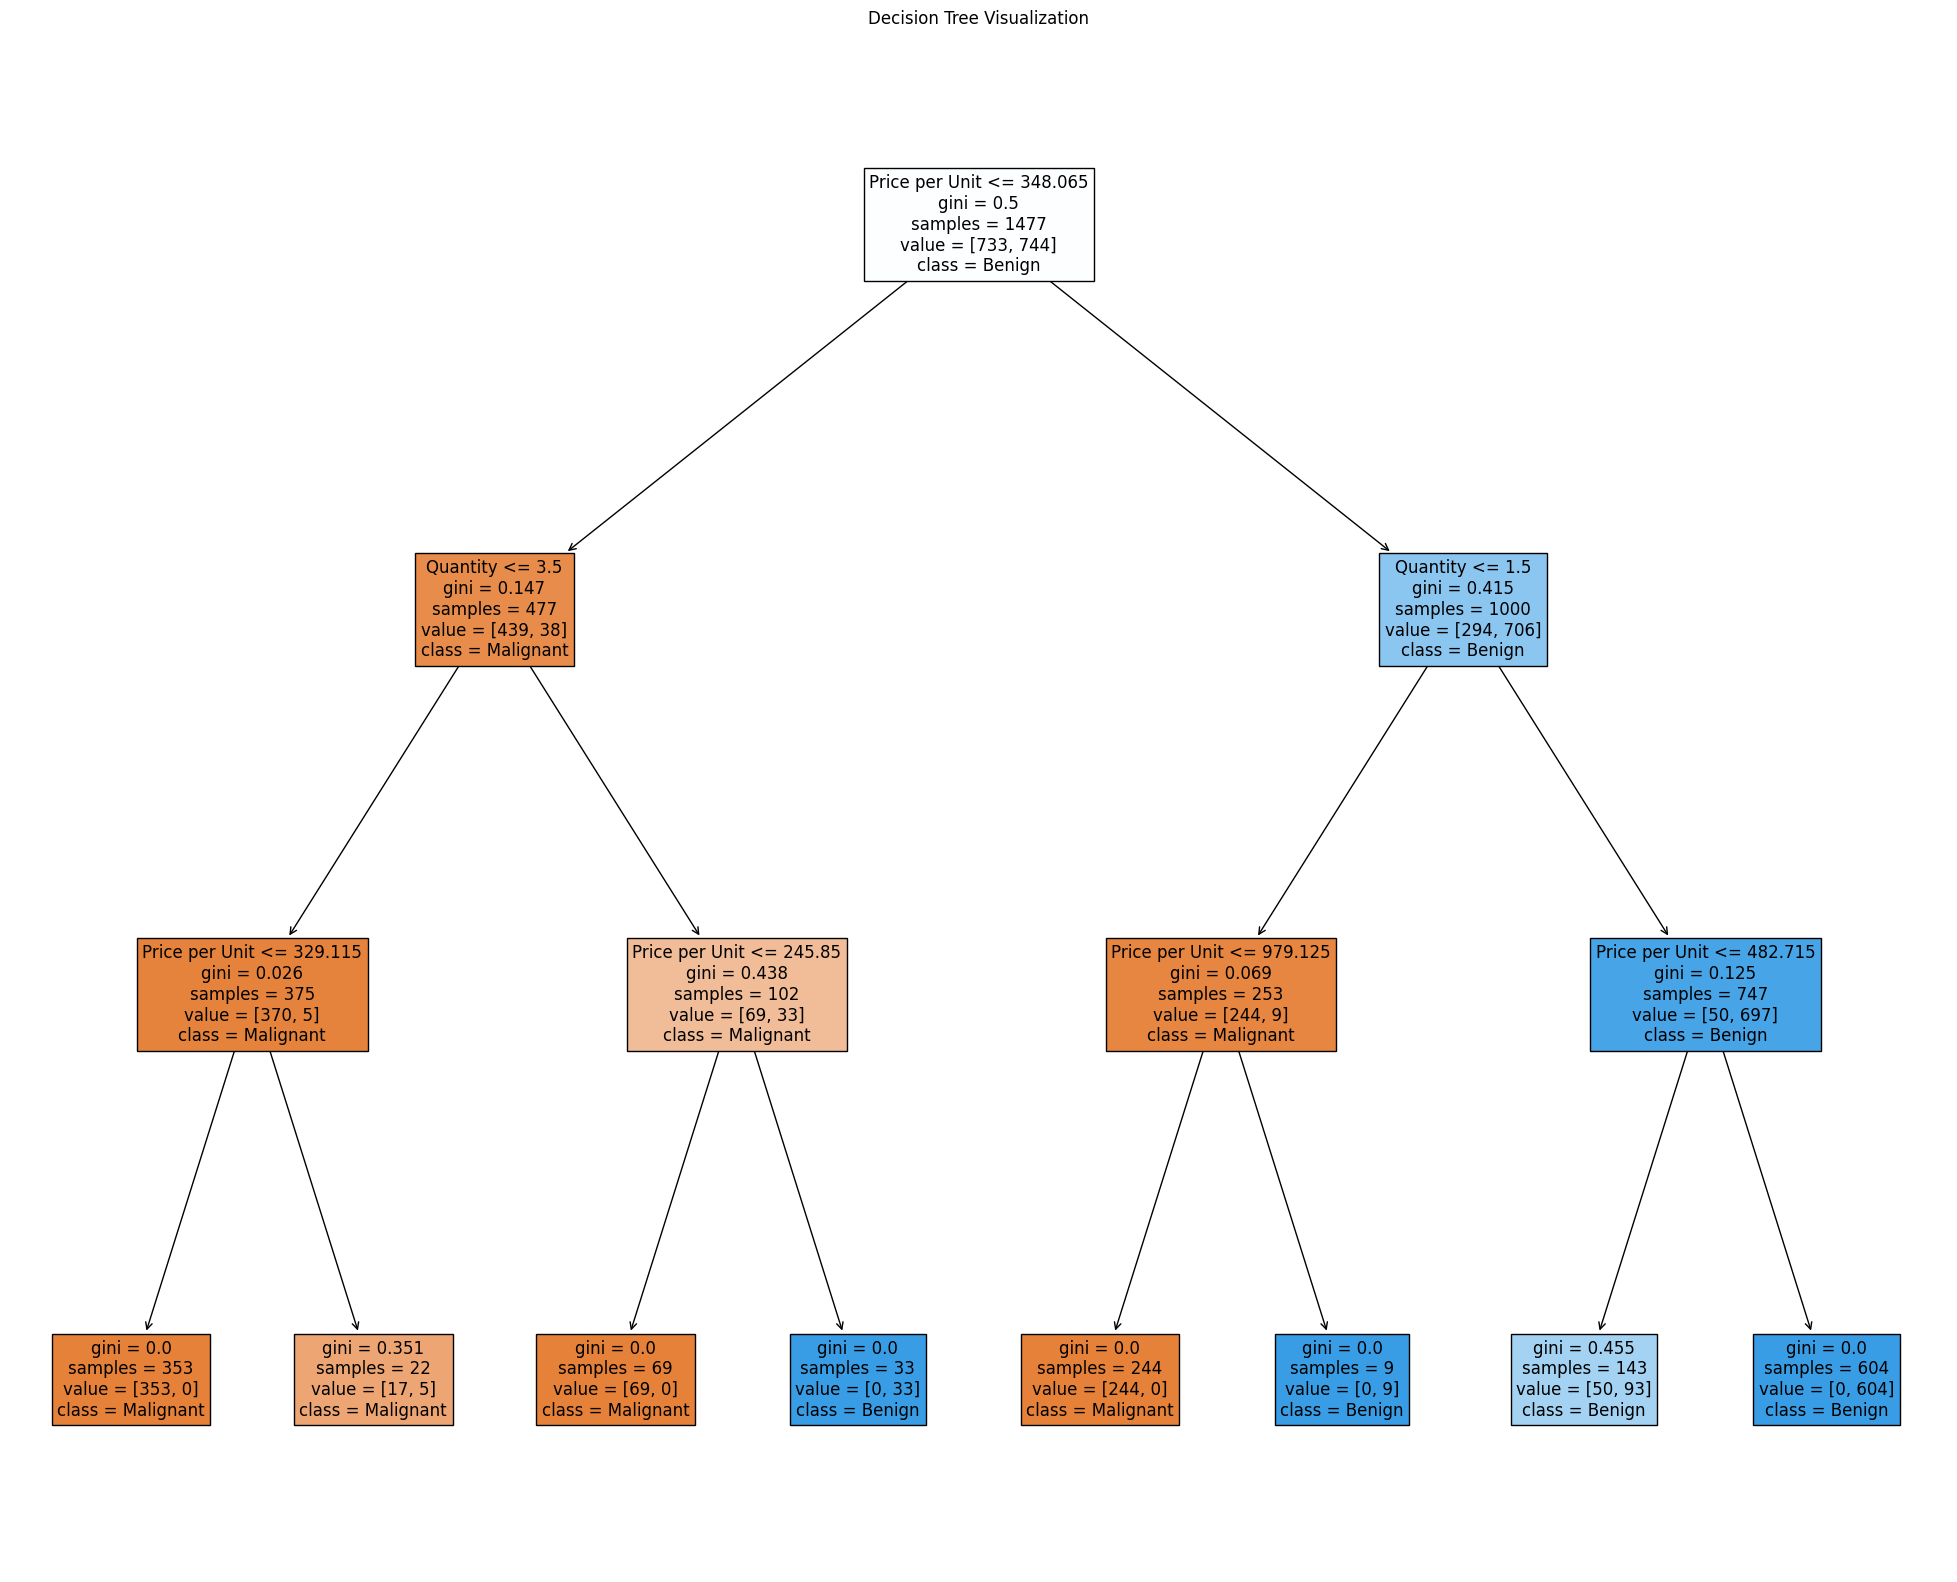

In [ ]:
# Handle missing values in 'Total Sales', 'Quantity', and 'Price per Unit'
data.dropna(subset=['Total Sales', 'Quantity', 'Price per Unit'], inplace=True)

# Selecting features and target for the classification
X = data[['Quantity', 'Price per Unit']]  # Independent variables
y = data['Total Sales']  # Dependent variable: Total Sales

# Convert 'Total Sales' into categories if not already (example here assumes a binary classification)
y = (y > y.median()).astype(int)  # Example condition to create two classes

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating and training the decision tree classifier
clf = DecisionTreeClassifier(max_depth=3)  # Limit depth to keep the tree small
clf.fit(X_train, y_train)# Plotting the decision tree
fig = plt.figure(figsize=(25,20))  # Creating a figure with the specified size
_ = tree.plot_tree(clf,
                   feature_names=X.columns,
                   class_names={0: 'Malignant', 1: 'Benign'},
                   filled=True,
                   fontsize=12)
plt.title('Decision Tree Visualization')
plt.show()

Confusion Matrix:
[[173  18]
 [  5 174]]
Accuracy: 0.9378378378378378
Precision: 0.90625
Recall: 0.9720670391061452


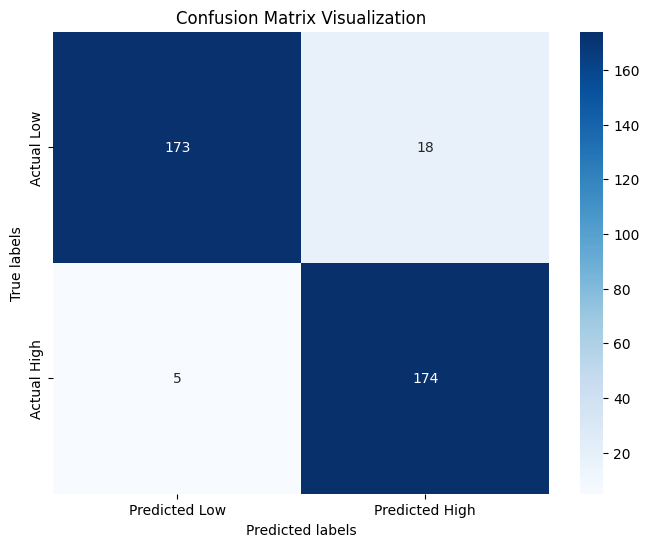

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

# ...


# ...
# Handle missing values in 'Total Sales', 'Quantity', and 'Price per Unit'
data.dropna(subset=['Total Sales', 'Quantity', 'Price per Unit'], inplace=True)

# Selecting features and target for the classification
X = data[['Quantity', 'Price per Unit']]  # Independent variables
y = data['Total Sales']  # Dependent variable: Total Sales

# Convert 'Total Sales' into categories if not already (example here assumes a binary classification)
y = (y > y.median()).astype(int)  # Example condition to create two classes

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating and training the decision tree classifier
clf = DecisionTreeClassifier(max_depth=3)  # Limit depth to keep the tree small
clf.fit(X_train, y_train)

# Predicting the labels for the test set
y_pred = clf.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

# Extracting the values from the confusion matrix
true_negative, false_positive, false_negative, true_positive = cm.ravel()

# Computing accuracy, precision, and recall
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

# Displaying the confusion matrix and metrics
print("Confusion Matrix:")
print(cm)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

# Visualization
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=['Predicted Low', 'Predicted High'], yticklabels=['Actual Low', 'Actual High'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix Visualization')

# Show the plot
plt.show()

End Task 4

**Task 5**

In [ ]:
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

try:
    # Load data
    data_path = '/content/pixel.txt'  # Make sure to replace with the correct path to your data file
    data1 = np.loadtxt(data_path)


    # Generate the linkage matrix
    Z = linkage(data_sample, method='ward')

    # Plotting the dendrogram
    plt.figure(figsize=(10, 7))
    plt.title('Hierarchical Clustering Dendrogram')
    dendrogram(Z)
    plt.xlabel('Sample index')
    plt.ylabel('Distance')
    plt.show()

except Exception as e:
    print(f"An error occurred: {e}")


An error occurred: name 'data_sample' is not defined


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Sum of Squared Errors (SSE): 37450750.964603126


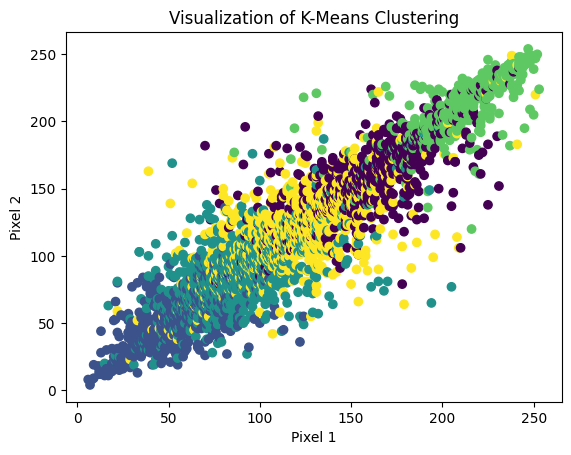

In [ ]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load data
data1 = np.loadtxt('/content/pixel.txt')  # Replace with the correct path to your data file

# Assuming the data needs to be reshaped into (N, 16) where N is the number of samples
data1 = data1.reshape(-1, 16)

# Initialize KMeans
kmeans = KMeans(n_clusters=5, random_state=0)  # Adjust the number of clusters as needed

# Fit KMeans on the data
kmeans.fit(data1)

# Predict the clusters
labels = kmeans.predict(data1)

# Compute SSE (inertia)
sse = kmeans.inertia_
print(f'Sum of Squared Errors (SSE): {sse}')


# Plotting the results
plt.scatter(data1[:, 0], data1[:, 1], c=labels, cmap='viridis')
plt.xlabel('Pixel 1')
plt.ylabel('Pixel 2')
plt.title('Visualization of K-Means Clustering')
plt.show()

End Of Task 5

Task 6


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

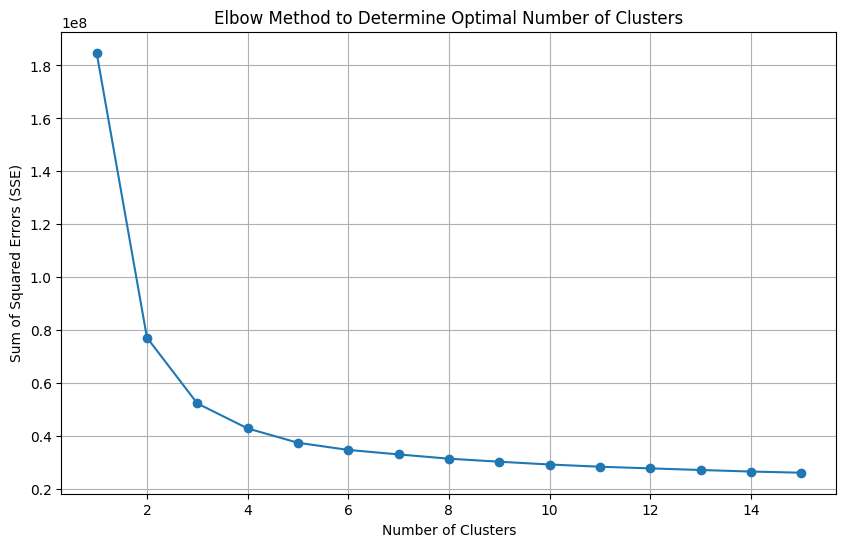

In [ ]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


# Assuming the data needs to be reshaped into (N, 16) where N is the number of samples
data1 = data1.reshape(-1, 16)

# List to hold the SSE values for different numbers of clusters
sse = []
cluster_list = range(1, 16)  # Testing 1 to 15 clusters

for k in cluster_list:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(data1)
    sse.append(kmeans.inertia_)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(cluster_list, sse, marker='o')
plt.title('Elbow Method to Determine Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.grid(True)
plt.show()


Sum of Squared Errors (SSE): 9526.865901307794


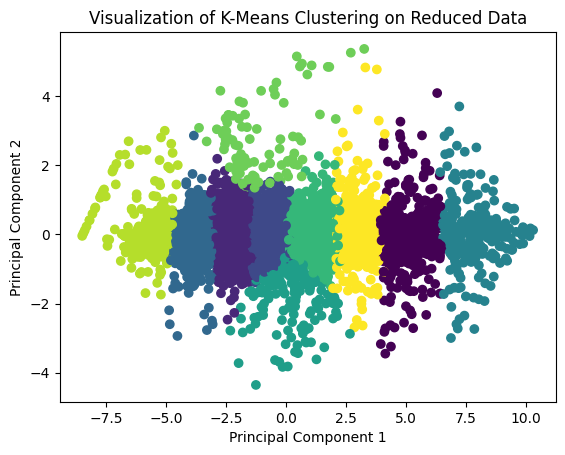

In [ ]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


# Reshape data into (N, 16) where N is the number of samples
data1= data1.reshape(-1, 16)

# Feature scaling
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data1)

# Dimensionality reduction
pca = PCA(n_components=10)  # Reduce to half the original dimensions as a starting point
data_reduced = pca.fit_transform(data_scaled)

# Initialize KMeans with K-means++ to improve centroid initialization
kmeans = KMeans(n_clusters=10, init='k-means++', n_init=10, random_state=0)  # Increase clusters and multiple initializations

# Fit KMeans on the scaled and reduced data
kmeans.fit(data_reduced)

# Predict the clusters
labels = kmeans.predict(data_reduced)

# Compute SSE (inertia)
sse = kmeans.inertia_
print(f'Sum of Squared Errors (SSE): {sse}')

# Plotting the results (first two principal components)
plt.scatter(data_reduced[:, 0], data_reduced[:, 1], c=labels, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Visualization of K-Means Clustering on Reduced Data')
plt.show()


End of Taskk6

Task 7


Sum of Squared Errors (SSE): 9729.134754760227


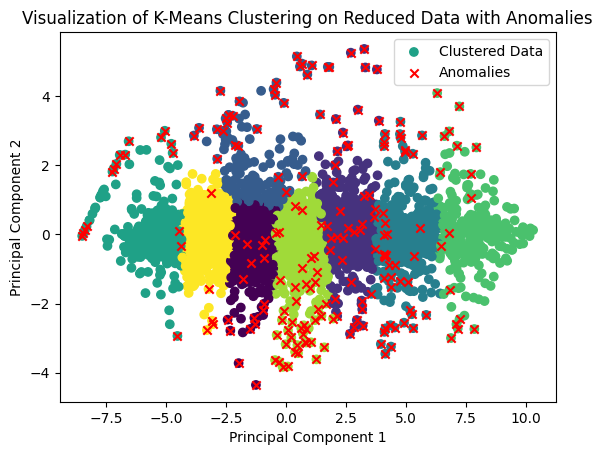

In [ ]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


# Reshape data into (N, 16) where N is the number of samples
data1 = data1.reshape(-1, 16)

# Feature scaling
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data1)

# Dimensionality reduction
pca = PCA(n_components=8)  # Reduce to half the original dimensions as a starting point
data_reduced = pca.fit_transform(data_scaled)

# Initialize KMeans with K-means++ to improve centroid initialization
kmeans = KMeans(n_clusters=8, init='k-means++', n_init=10, random_state=0)

# Fit KMeans on the scaled and reduced data
kmeans.fit(data_reduced)

# Predict the clusters
labels = kmeans.predict(data_reduced)

# Compute SSE (inertia)
sse = kmeans.inertia_
print(f'Sum of Squared Errors (SSE): {sse}')
# Calculate the distance from each point to its cluster center

distances = kmeans.transform(data_reduced)
# Find the index of the nearest cluster center for each point
closest = np.argmin(distances, axis=1)
# Calculate the distance to the nearest cluster center
min_distances = distances[np.arange(len(distances)), closest]

# Define a threshold for what you consider an anomaly (e.g., 95th percentile of distances)
threshold = np.percentile(min_distances, 95)

# Identify anomalies
anomalies = data_reduced[min_distances > threshold]

# Plotting the results (first two principal components)
plt.scatter(data_reduced[:, 0], data_reduced[:, 1], c=labels, cmap='viridis', label='Clustered Data')
plt.scatter(anomalies[:, 0], anomalies[:, 1], c='red', marker='x', label='Anomalies')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Visualization of K-Means Clustering on Reduced Data with Anomalies')
plt.legend()
plt.show()


Sum of Squared Errors (SSE): 7074.797083472144


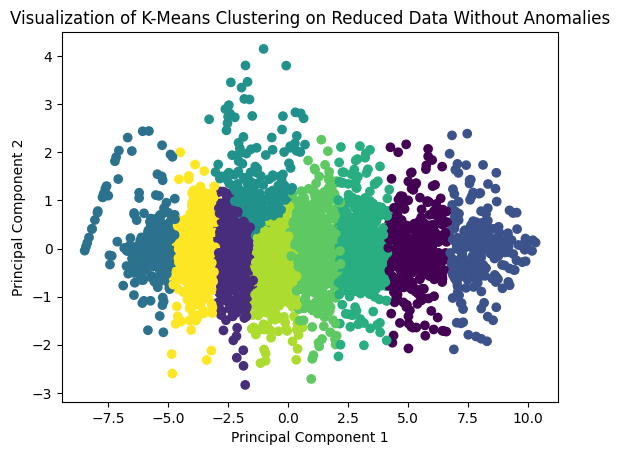

In [ ]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Load data

# Reshape data into (N, 16) where N is the number of samples
data1 = data1.reshape(-1, 16)

# Feature scaling
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data1)

# Dimensionality reduction
pca = PCA(n_components=9)  # Reduce to half the original dimensions as a starting point
data_reduced = pca.fit_transform(data_scaled)

# Initialize KMeans with K-means++ to improve centroid initialization
kmeans = KMeans(n_clusters=9, init='k-means++', n_init=10, random_state=0)

# Fit KMeans on the scaled and reduced data
kmeans.fit(data_reduced)

# Predict the clusters
labels = kmeans.predict(data_reduced)

# Calculate the distance from each point to its cluster center
distances = kmeans.transform(data_reduced)
# Find the index of the nearest cluster center for each point
closest = np.argmin(distances, axis=1)
# Calculate the distance to the nearest cluster center
min_distances = distances[np.arange(len(distances)), closest]

# Define a threshold for what you consider an anomaly (e.g., 95th percentile of distances)
threshold = np.percentile(min_distances, 95)

# Filter out anomalies to keep only the normal data
normal_data_indices = min_distances <= threshold
data_filtered = data_reduced[normal_data_indices]
labels_filtered = labels[normal_data_indices]

# Optionally, refit KMeans without the anomalies
kmeans.fit(data_filtered)
labels_filtered = kmeans.predict(data_filtered)

# Compute SSE (inertia)
sse = kmeans.inertia_
print(f'Sum of Squared Errors (SSE): {sse}')

# Plotting the results (first two principal components) without anomalies
plt.scatter(data_filtered[:, 0], data_filtered[:, 1], c=labels_filtered, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Visualization of K-Means Clustering on Reduced Data Without Anomalies')
plt.show()
